In [10]:
from datetime import date
from dateutil.relativedelta import relativedelta
import datetime

# start = date(2017, 1, 1)
# end = date(2026, 1, 1)

start = '2017-01-01'
end = '2026-01-01'
start = datetime.datetime.strptime(start, '%Y-%m-%d')
end = datetime.datetime.strptime(end, '%Y-%m-%d')

current = start

while current <= end:
    # print(current.strftime("%Y"))
    print(current)
    current += relativedelta(days=1) # relativedelta(years=1)

2017-01-01 00:00:00
2017-01-02 00:00:00
2017-01-03 00:00:00
2017-01-04 00:00:00
2017-01-05 00:00:00
2017-01-06 00:00:00
2017-01-07 00:00:00
2017-01-08 00:00:00
2017-01-09 00:00:00
2017-01-10 00:00:00
2017-01-11 00:00:00
2017-01-12 00:00:00
2017-01-13 00:00:00
2017-01-14 00:00:00
2017-01-15 00:00:00
2017-01-16 00:00:00
2017-01-17 00:00:00
2017-01-18 00:00:00
2017-01-19 00:00:00
2017-01-20 00:00:00
2017-01-21 00:00:00
2017-01-22 00:00:00
2017-01-23 00:00:00
2017-01-24 00:00:00
2017-01-25 00:00:00
2017-01-26 00:00:00
2017-01-27 00:00:00
2017-01-28 00:00:00
2017-01-29 00:00:00
2017-01-30 00:00:00
2017-01-31 00:00:00
2017-02-01 00:00:00
2017-02-02 00:00:00
2017-02-03 00:00:00
2017-02-04 00:00:00
2017-02-05 00:00:00
2017-02-06 00:00:00
2017-02-07 00:00:00
2017-02-08 00:00:00
2017-02-09 00:00:00
2017-02-10 00:00:00
2017-02-11 00:00:00
2017-02-12 00:00:00
2017-02-13 00:00:00
2017-02-14 00:00:00
2017-02-15 00:00:00
2017-02-16 00:00:00
2017-02-17 00:00:00
2017-02-18 00:00:00
2017-02-19 00:00:00


# Draw The Trend of BTC USDT

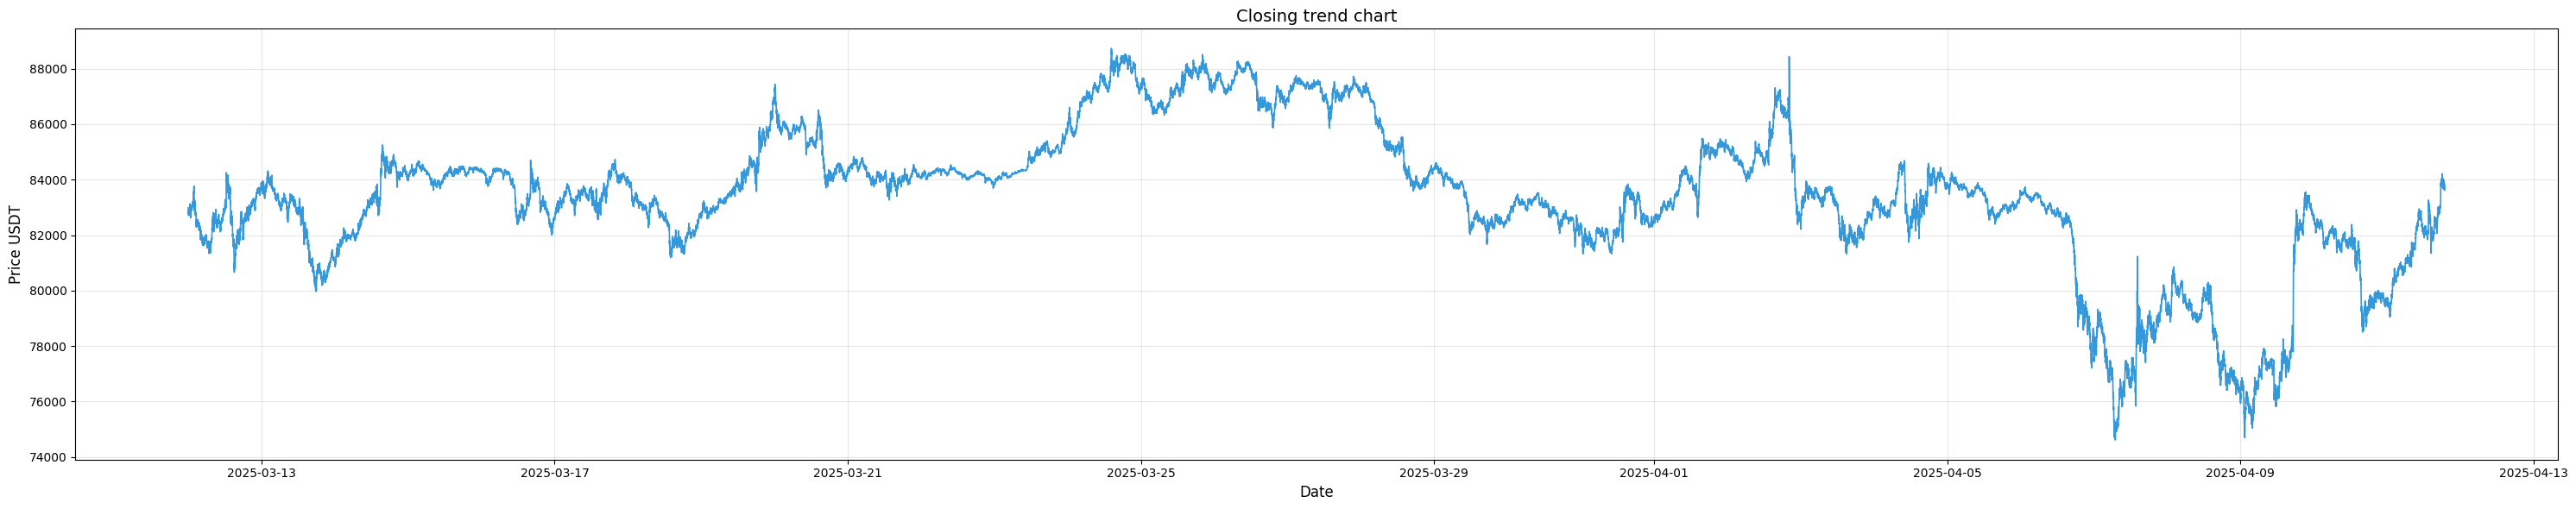

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


def load_data(csv_path='./data/BTC-USDT_2025-03-12_2025-04-12_1m.csv'):
    df = pd.read_csv(csv_path, parse_dates=['datetime'], index_col='datetime')
    df = df.sort_index()
    df = df[['open', 'high', 'low', 'close', 'volume']]
    df = df.ffill()
    return df


def draw_trend_chart(df):
    plt.figure(figsize=(30,6))
    plt.plot(df['close'], color='#3498DB', linewidth=1.2)
    plt.title('Closing trend chart', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price USDT', fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    
    
df = load_data()
draw_trend_chart(df)

# Draw The Candlestick chart of BTC USDT

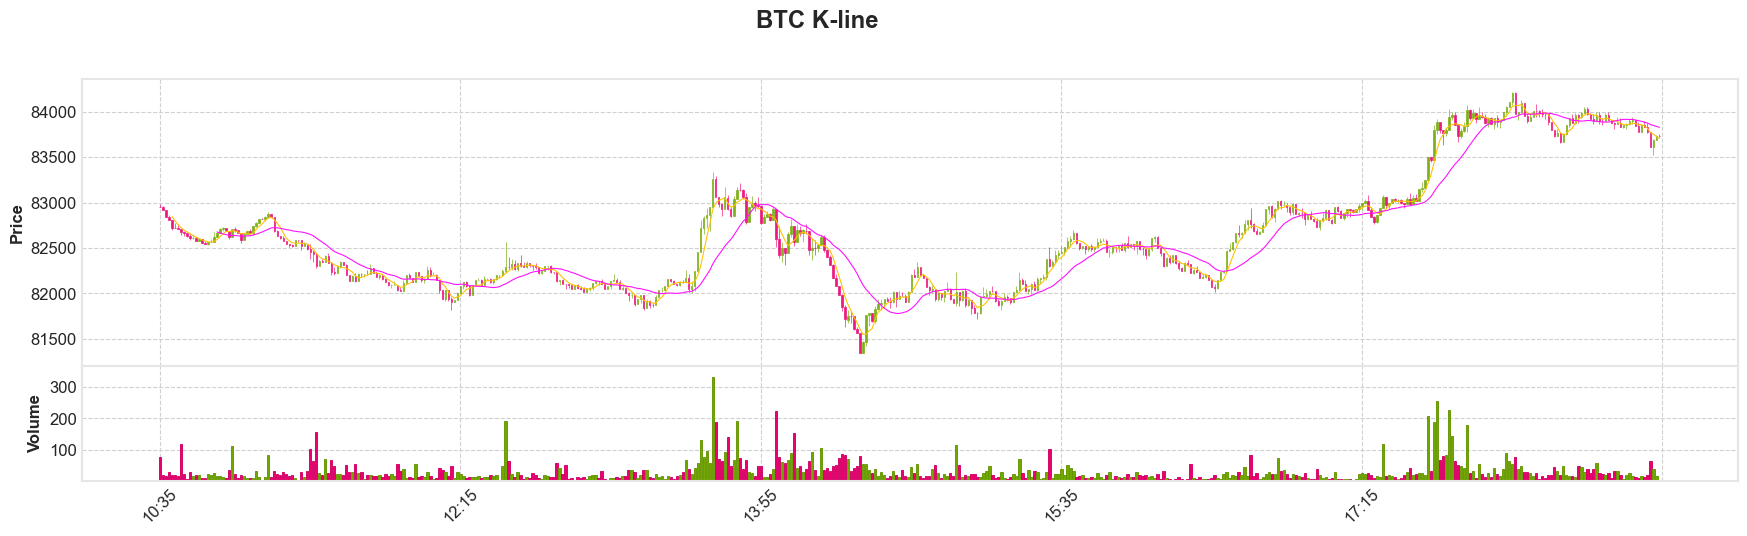

In [ ]:
import mplfinance as mpf

def kline(df):
    mpf.plot(df[-500:],  # 显示最近x条数据
            type='candle',
            style='binance', # 交易所风格配色
            title='BTC K-line',
            ylabel='Price',
            volume=True, # 叠加成交量柱状图
            mav=(5,20), # 显示5日和20日均线‌
            figratio=(60,15))

kline(df)

# 可交互K线图

In [13]:
import plotly.graph_objects as go


def interactive_visualization_kline(df):
    fig = go.Figure(data=[go.Candlestick(x=df.index,
                                        open=df['open'],
                                        high=df['high'],
                                        low=df['low'],
                                        close=df['close'],
                                        )])
    fig.update_layout(title='交互式K线图', xaxis_rangeslider_visible=False)
    fig.show()

df = df[-100:]
interactive_visualization_kline(df)

In [ ]:
import pandas as pd
import numpy as np
# 假设df是包含价格数据的DataFrame, 'Close'列是收盘价
df['Short_MA'] = df['Close'].rolling(window=5).mean() # 计算短期均线
df['Long_MA'] = df['Close'].rolling(window=20).mean() # 计算长期均线
df['Signal'] = np.where(df['Short_MA'] > df['Long_MA'], 1, -1) # 生成信号:1表示买入,-1表示卖出/做空```


In [17]:
#code
import pandas as pd
from collections import OrderedDict
data = OrderedDict()
# datas = OrderedDict()
path = './data/BTC-USDT_2025-03-12_2025-04-12_1m.csv'
data['BTC'] = pd.read_csv(path, index_col=0, parse_dates=['datetime'])
data['BTC'].columns = ['Open', 'High', 'Low', 'Close', 'Volume']
print(data['BTC'].head())
type(data['BTC'])

                               Open      High       Low     Close    Volume
datetime                                                                   
2025-03-12 00:00:00+00:00  82932.99  83000.00  82927.23  82985.78  12.20062
2025-03-12 00:01:00+00:00  82985.78  82985.78  82850.00  82850.01   7.93602
2025-03-12 00:02:00+00:00  82850.01  82853.90  82773.99  82799.54  21.21357
2025-03-12 00:03:00+00:00  82799.54  82867.93  82781.22  82781.22  12.66108
2025-03-12 00:04:00+00:00  82781.22  82800.00  82727.28  82785.36  14.50121


pandas.core.frame.DataFrame

In [2]:
import pandas as pd
import  backtrader as bt


data = bt.feeds.GenericCSVData(
    dataname = './data/BTC-USDT_1m.csv',
    dtformat = ('%Y-%m-%d %H:%M:%S'),
    datetime=0,     # 指定为第0列
    open=1,         # 指定为第1列 
    high=2,          # 以此类推
    low=3,
    close=4,
    volume=5,
    timeframe=bt.TimeFrame.Minutes,
)

# Dataset

In [1]:
import pandas as pd
import  backtrader as bt
from datetime import datetime

%matplotlib inline

df = pd.read_csv('./data/BTC-USDT_1m.csv')
df['datetime'] = pd.to_datetime(df['datetime'], utc=True)  # 自动识别时区并转为UTC
df.set_index('datetime', inplace=True)

start_date = datetime(2025, 4, 5, 00, 00, 00)  # 回测开始时间
end_date = datetime(2025, 4, 10, 00, 00, 00)  # 回测结束时间

data = bt.feeds.PandasData(dataname=df, fromdate=start_date, todate=end_date, timeframe=bt.TimeFrame.Minutes)

# data = bt.feeds.GenericCSVData(
#     dataname = './data/BTC-USDT_1m.csv',
#     dtformat = ('%Y-%m-%d %H:%M:%S'),
#     datetime=0,     # 指定为第0列
#     open=1,         # 指定为第1列 
#     high=2,          # 以此类推
#     low=3,
#     close=4,
#     volume=5,
#     timeframe=bt.TimeFrame.Minutes,
# )



# Strategy

In [2]:
class MyStrategy(bt.Strategy):
    params = (('myparam', 27), 
              ('exitbars', 5),
              ('maperiod', 20)
              )
    
    def log(self, txt, dt=None):
        ''' Logging function for this strategy'''
        # 注意要和datetime类型适配，使用datetime(0)表示当前时间
        dt = dt or self.datas[0].datetime.datetime(0) 
        # dt.isoformat(sep=" ")格式化输出，以空格为date和time的分隔符
        print('%s, %s' % (dt.isoformat(sep=" "), txt)) 

    def __init__(self):
        # 为每一列，创建一个bar
        self.dataopen = self.datas[0].open      # 开盘价bar  self.datas[0]指向的是大脑通过cerebro.adddata函数加载的第一个数据
        self.datahigh = self.datas[0].high      # 最高价bar
        self.datalow = self.datas[0].low        # 最低价bar
        self.dataclose = self.datas[0].close    # 收盘价bar self.datas[0].close指向的是close （收盘价）line
        self.datavolume = self.datas[0].volume  # 成交量bar
        
        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        self.sma = bt.indicators.MovingAverageSimple(self.datas[0], period=self.params.maperiod)

    def notify_order(self, order):
        """
        订单状态的改变会通过notify方法通知到strategy。
        通过覆盖 notify_order() 方法监听订单状态（如提交、成交、取消或拒绝），实时更新 self.order 的状态信息‌
        """

        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return
 
        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log('BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %(order.executed.price, order.executed.value, order.executed.comm))
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm

            elif order.issell():
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' % (order.executed.price,  order.executed.value, order.executed.comm))
 
            self.bar_executed = len(self) # 最后一次执行交易时bar的位置
 
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')
 
        # Write down: no pending order
        self.order = None
    
    def notify_trade(self, trade):#交易执行后，在这里处理
        if not trade.isclosed:
            return
        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %(trade.pnl, trade.pnlcomm)) #记录下盈利数据。 Gross：毛利；Net:净利

    def next(self): 
        """
        strategy 的next方法针对self.dataclose(也就是收盘价Line)的每一行,也就是Bar,进行处理。
        next方法是Strategy最重要的的方法,
        具体策略的实现都在这个函数中，后续还会详细介绍。
        """
        
        self.log('Close, {:.2f}'.format(self.dataclose[0]))
        if self.order:  # Check if an order is pending ... if yes, we cannot send a 2nd one
            return
        # Check if we are in the market
        if not self.position: # 大于均线就买
            if self.dataclose[0] > self.sma[0]: # BUY, BUY, BUY!!! (with all possible default parameters)
                self.log('BUY CREATE, %.2f' % self.dataclose[0])
                self.order = self.buy() # Keep track of the created order to avoid a 2nd order
                # print('order:', self.order)
        else:
            if self.dataclose[0] < self.sma[0]: # 小于均线卖卖卖！
                self.log('SELL CREATE, %.2f' % self.dataclose[0])
                self.order = self.sell()  # Keep track of the created order to avoid a 2nd order
 
        # # 检查是否在市场
        # if not self.position: # 访问postion获取是否在市场内, 不在市场内就不能卖， 可以买。合理
        #     # 不在，那么连续3天价格下跌就买点
        #     if self.dataclose[0] < self.dataclose[-1]: # 当前价格比上一次低
        #         if self.dataclose[-1] < self.dataclose[-2]: # 上一次的价格比上上次低  买入!!! 
        #             self.log('BUY CREATE, %.2f' % self.dataclose[0])
        #             self.order = self.buy() # Keep track of the created order to avoid a 2nd order
        # else: # 已经在市场，5天后就卖掉。
        #     # 在backtrader中，重写了len函数，返回的是已经处理过数据行（也就是Bar）。
        #     if len(self) >= (self.bar_executed + self.p.exitbars): #这里注意，Len(self)返回的是当前执行的bar数量，每次next会加1.而Self.bar_executed记录的最后一次交易执行时的bar位置。
        #         # SELL, SELL, SELL!!! (with all possible default parameters)
        #         self.log('SELL CREATE, %.2f' % self.dataclose[0])
        #         self.order = self.sell() # Keep track of the created order to avoid a 2nd order


In [3]:

cerebro = bt.Cerebro() # 实例化 创建了一个机器人大脑（Cerebro），同时隐含创建了一个borker（券商）。

cerebro.adddata(data) # 添加策略
cerebro.broker.setcash(1000) # set init cash
cerebro.broker.setcommission(0.00075) # 设置佣金， 根据交易成本设置
cerebro.addsizer(bt.sizers.FixedSize, stake=0.001) # 设置每次买多少股票

print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.addstrategy(MyStrategy, myparam=20, exitbars=7) # 自定义策略

cerebro.run() # 运行 让机器人大脑开始运行。
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.plot()


Starting Portfolio Value: 1000.00
2025-04-05 00:19:00, Close, 83831.73
2025-04-05 00:19:00, BUY CREATE, 83831.73
2025-04-05 00:20:00, BUY EXECUTED, Price: 83831.74, Cost: 83.83, Comm 0.06
2025-04-05 00:20:00, Close, 83828.59
2025-04-05 00:21:00, Close, 83792.29
2025-04-05 00:22:00, Close, 83782.62
2025-04-05 00:23:00, Close, 83770.77
2025-04-05 00:24:00, Close, 83753.34
2025-04-05 00:24:00, SELL CREATE, 83753.34
2025-04-05 00:25:00, SELL EXECUTED, Price: 83753.34, Cost: 83.83, Comm 0.06
2025-04-05 00:25:00, OPERATION PROFIT, GROSS -0.08, NET -0.20
2025-04-05 00:25:00, Close, 83722.68
2025-04-05 00:26:00, Close, 83698.82
2025-04-05 00:27:00, Close, 83728.00
2025-04-05 00:28:00, Close, 83738.49
2025-04-05 00:29:00, Close, 83750.01
2025-04-05 00:30:00, Close, 83724.07
2025-04-05 00:31:00, Close, 83698.84
2025-04-05 00:32:00, Close, 83698.84
2025-04-05 00:33:00, Close, 83708.69
2025-04-05 00:34:00, Close, 83679.17
2025-04-05 00:35:00, Close, 83676.38
2025-04-05 00:36:00, Close, 83672.78
20

<IPython.core.display.Javascript object>

[[<Figure size 640x480 with 4 Axes>]]

In [4]:
cerebro.plot()

<IPython.core.display.Javascript object>

[[<Figure size 640x480 with 4 Axes>]]